In [1]:
import numpy as np
import math

In [2]:
# 1
def ecuacion(a,b,c):
    x1 =  (-b + math.sqrt((b**2) - (4*a*c))) / (2*a)
    x2 =  (-b - math.sqrt((b**2) - (4*a*c))) / (2*a)
    print("X1: ",x1,"X2: ",x2)

In [3]:
# 2
def palindromo(string):
    print("Por favor que no tenga acentos el string ya que daria error")
    return string.lower().replace(" ","") == string.lower().replace(" ","")[::-1]

In [4]:
# 3
dict_cuadrada = {x:x**2 for x in range(1,11)}

In [5]:
#4
codigo_morse = {
    "a": ".-", "b": "-...", "c": "-.-.", "d": "-..", "e": ".", "f": "..-.", 
    "g": "--.", "h": "....", "i": "..", "j": "·---", "k": "-.-", "l": ".-..", 
    "m": "--", "n": "-.", "ñ": "--.--", "o": "---", "p": ".__.", "q": "--.-",
    "r": ".-.", "s": "...", "t": "-", "u": "..-", "v": "...-", "w": ".--",
    "x": "-..-", "y": "-.--", "z": "--..",
    
    "0": "-----", "1": ".----", "2": "..---", "3": "...--", "4": "....-", 
    "5": ".....", "6": "-....", "7": "--...", "8": "---..", "9": "----.",
    
    ".": ".-.-.-", ",": "-.-.--", "?": "..--..", "\"": ".-..-."
}

In [6]:
def leer_morse():
    string = str(input("Escribe una frase")).lower()
    traducion = ""
    for letra in string:
        if letra != " " :
            traducion += codigo_morse[letra]
        else:
            traducion += letra
    print(traducion)

In [7]:
# 5
def comparar_dict(a,b):
    return set(a.keys()).intersection(b.keys())

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
url =r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Titanic\train.csv"
df = pd.read_csv(url)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
# cross tab
pclass = pd.crosstab(index=df["Pclass"],columns=[df["Survived"],df["Sex"]],margins=True)
pclass

Survived      0           1       All
Sex      female male female male     
Pclass                               
1             3   77     91   45  216
2             6   91     70   17  184
3            72  300     72   47  491
All          81  468    233  109  891

In [11]:
# cross tab con frecuency y total
pclass / pclass.loc["All"]

Survived         0                   1                 All
Sex         female      male    female      male          
Pclass                                                    
1         0.037037  0.164530  0.390558  0.412844  0.242424
2         0.074074  0.194444  0.300429  0.155963  0.206510
3         0.888889  0.641026  0.309013  0.431193  0.551066
All       1.000000  1.000000  1.000000  1.000000  1.000000

In [12]:
pd.crosstab(index=df["Sex"],columns="Total") # asi vemos totales

col_0,Total
Sex,
female,314
male,577


In [13]:
import os
path = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master"
print(os.path.join(path,r"Curso_Udemy_Estadistica_desc\r-basic-master\data\datacrab.txt"))

C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\Curso_Udemy_Estadistica_desc\r-basic-master\data\datacrab.txt


In [14]:
# cangrejos 
url1 = os.path.join(path,r"Curso_Udemy_Estadistica_desc\r-basic-master\data\datacrab.txt")
crabs = pd.read_table(url1,sep=" ").iloc[:,1:]
crabs.head(3)

,color,spine,width,satell,weight
0,3,3,28.3,8,3050
1,4,3,22.5,0,1550
2,2,1,26.0,9,2300


In [15]:
crabs["Rank"]=pd.cut(crabs["width"],bins=4,right=False,labels=["Pequeño","Mediano","Grande","Muy_grande"])

In [16]:
pd.cut(crabs["width"],bins=4,right=False,labels=["Pequeño","Mediano","Grande","Muy_grande"])

0       Grande
1      Pequeño
2      Mediano
3      Mediano
4      Mediano
        ...   
168    Mediano
169     Grande
170     Grande
171    Mediano
172    Mediano
Name: width, Length: 173, dtype: category
Categories (4, object): [Pequeño < Mediano < Grande < Muy_grande]

In [17]:
rank_cross = pd.crosstab(index=crabs["color"],columns=crabs["Rank"],margins=True)

In [18]:
rank_cross

Rank,Pequeño,Mediano,Grande,Muy_grande,All
color,,,,,
2,0,7,5,0,12
3,10,46,35,4,95
4,10,25,9,0,44
5,6,13,3,0,22
All,26,91,52,4,173


In [19]:
rank_color = rank_cross / rank_cross.loc["All"]

In [20]:
rank_cross/ rank_cross["All"].values.reshape(-1,1) # aqui los totales en la ultima columna

Rank,Pequeño,Mediano,Grande,Muy_grande,All
color,,,,,
2,0.000000,0.583333,0.416667,0.000000,1.0
3,0.105263,0.484211,0.368421,0.042105,1.0
4,0.227273,0.568182,0.204545,0.000000,1.0
5,0.272727,0.590909,0.136364,0.000000,1.0
All,0.150289,0.526012,0.300578,0.023121,1.0


In [21]:
rank_color # los totales en la ultima fila

Rank,Pequeño,Mediano,Grande,Muy_grande,All
color,,,,,
2,0.000000,0.076923,0.096154,0.0,0.069364
3,0.384615,0.505495,0.673077,1.0,0.549133
4,0.384615,0.274725,0.173077,0.0,0.254335
5,0.230769,0.142857,0.057692,0.0,0.127168
All,1.000000,1.000000,1.000000,1.0,1.000000


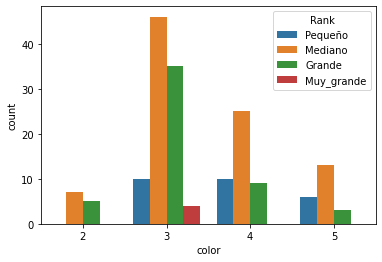

In [22]:
sns.countplot(x="color",data=crabs,hue="Rank")

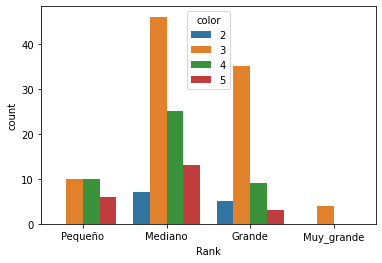

In [23]:
# son mas pequeños los cangrejos a mas calores?
sns.countplot(x="Rank",data=crabs,hue="color")

In [24]:
color_cumsum = pd.DataFrame(index=[2,3,4,5])

In [25]:
rank_color.columns

Index(['Pequeño', 'Mediano', 'Grande', 'Muy_grande', 'All'], dtype='object', name='Rank')

In [26]:
for col in ['Pequeño', 'Mediano', 'Grande', 'Muy_grande']:
    color_cumsum[col] = rank_color[col].cumsum()

In [27]:
color_cumsum

,Pequeño,Mediano,Grande,Muy_grande
2,0.000000,0.076923,0.096154,0.0
3,0.384615,0.582418,0.769231,1.0
4,0.769231,0.857143,0.942308,1.0
5,1.000000,1.000000,1.000000,1.0


In [28]:
df_cumsum = color_cumsum.stack().reset_index()
df_cumsum.columns = ["color","size","Percentage"]
df_cumsum

,color,size,Percentage
0,2,Pequeño,0.000000
1,2,Mediano,0.076923
2,2,Grande,0.096154
3,2,Muy_grande,0.000000
4,3,Pequeño,0.384615
5,3,Mediano,0.582418
6,3,Grande,0.769231
7,3,Muy_grande,1.000000
8,4,Pequeño,0.769231
9,4,Mediano,0.857143


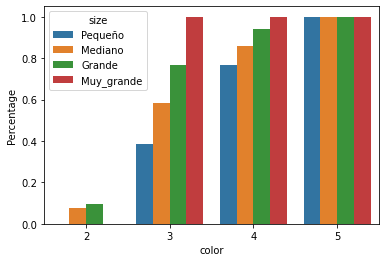

In [29]:
sns.barplot(x="color",y="Percentage",data=df_cumsum,hue="size")

In [30]:
# planetas
planets = sns.load_dataset("planets")
planets.shape

(1035, 6)

In [31]:
planets.head(3)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011


In [32]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [33]:
nulos = planets.isnull().sum()
nulos[nulos>0]

orbital_period     43
mass              522
distance          227
dtype: int64

In [34]:
planets.describe(include="object")

,method
count,1035
unique,10
top,Radial Velocity
freq,553


In [35]:
planets.groupby("method")["year"].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [36]:
# diagrama cajas
np.random.seed(0)
dist = 100 * np.random.rand(50)
dist2 = 50 * np.ones(25)
dist3 = 100+100*np.random.rand(10)
dist4 =-100*np.random.rand(10)
data = np.concatenate((dist,dist2,dist3,dist4))

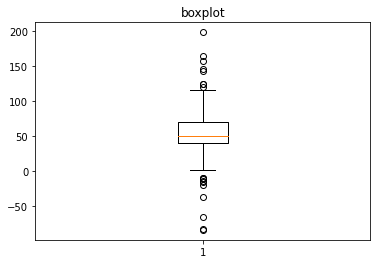

In [37]:
fig,ax= plt.subplots()
ax.set_title("boxplot")
ax.boxplot(data)
plt.show(block=None)


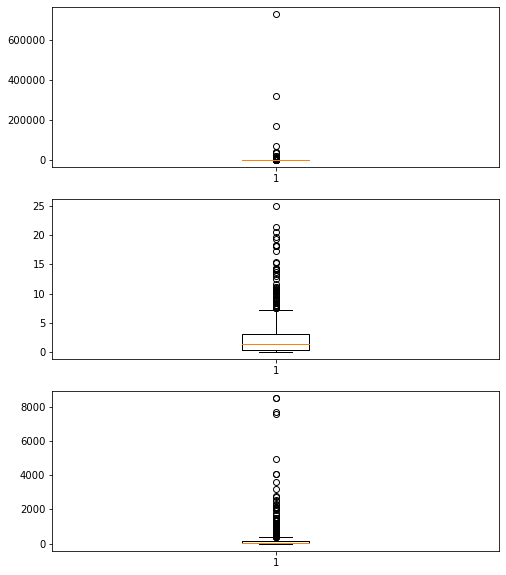

In [38]:
fig,ax=plt.subplots(3,figsize=(8,10))
for num,sub in enumerate(["orbital_period","mass","distance"]):
    ax[num].boxplot(planets[sub].dropna())

In [39]:
titanic = pd.read_csv(r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\Titanic\train.csv")
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [40]:
titanic.pivot_table("Survived",index="Sex",columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [41]:
titanic.pivot_table(index="Sex",columns="Pclass",aggfunc={"Survived":sum,"Fare":"mean"})

Fare                       Survived        
Pclass           1          2          3        1   2   3
Sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47

In [42]:
import os
path = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\Curso_Udemy_Estadistica_desc\r-basic-master\data"
file = "us-births.csv"
df = pd.read_csv(os.path.join(path,file))
df.head(3)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454


<Figure size 1080x576 with 0 Axes>

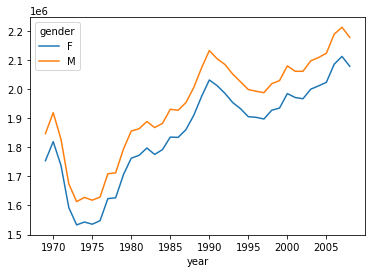

In [43]:
plt.figure(figsize=(15,8))
anos_pivot = df.pivot_table("births",index="year",columns="gender",aggfunc="sum")
anos_pivot.plot()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [47]:
quartiles = np.percentile(df.births,[25,50,75])
quartiles

array([4358. , 4814. , 5289.5])

In [50]:
med = quartiles[1] # mediana
IQR = quartiles[2]-quartiles[0] # rango intercuartil
sig = 0.75*IQR

In [56]:
df_new = df.query("(births> @med - 5*@sig) & (births< @med + 5*@sig)")
df_new.shape

(14610, 5)

In [65]:
df_new.loc[:,"day"] = df_new.loc[:,"day"].values.astype(int)

C:\Users\gonza\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [68]:
df_new.index = pd.to_datetime(df_new.year*10000 + df_new.month*100+df_new.day,format="%Y%m%d")

In [69]:
df_new.head(3)

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454


In [76]:
df_new["decade"] = (df_new.loc[:,"year"].values//10) * 10

<ipython-input-76-b64023ca6581>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["decade"] = (df_new.loc[:,"year"].values//10) * 10


In [77]:
df_new.head(2)

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960


In [79]:
df_new["dayofweek"] = df_new.index.dayofweek

<ipython-input-79-4f43aebac998>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["dayofweek"] = df_new.index.dayofweek


In [87]:
df_new = df_new.drop("dayofweek1",axis=1)

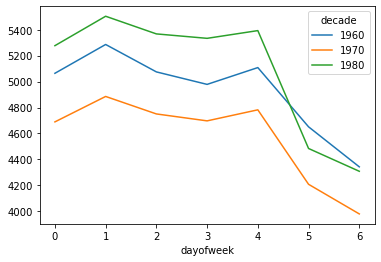

In [89]:
df_new.pivot_table("births",index="dayofweek",columns="decade").plot()

In [98]:
baby_dia = df_new.dropna(axis=0).groupby(["month","day"])["births"].mean()

In [99]:
baby_dia.index = [pd.datetime(2020,month,day) for (month,day) in baby_dia.index ]

<ipython-input-99-c79f0d58eb30>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  baby_dia.index = [pd.datetime(2020,month,day) for (month,day) in baby_dia.index ]


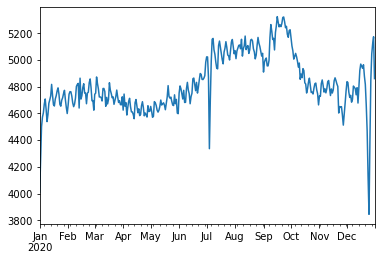

In [101]:
baby_dia.plot()